# EDA

3.1
This is for the second capstone project. The project goal is to predict whether tweets are discussing an actual disaster based on the text -- it is from this kaggle challenge: https://www.kaggle.com/c/nlp-getting-started/overview. 

The data wrangling was done previously here: 


# 3.1 imports

In [1]:
#imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 3.2 data

In [2]:
train_data_c = pd.read_csv('C:/Users/bourg/OneDrive/Documents/springboard/NLP getting started/cleaned/train_data_clean.csv')
test_data_c = pd.read_csv('C:/Users/bourg/OneDrive/Documents/springboard/NLP getting started/cleaned/test_data_clean.csv')

In [3]:
train_data_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7552 entries, 0 to 7551
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  7552 non-null   int64 
 1   id          7552 non-null   int64 
 2   keyword     7552 non-null   object
 3   location    5080 non-null   object
 4   text        7552 non-null   object
 5   target      7552 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 354.1+ KB


In [4]:
test_data_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3263 non-null   int64 
 1   id          3263 non-null   int64 
 2   keyword     3237 non-null   object
 3   location    2157 non-null   object
 4   text        3263 non-null   object
dtypes: int64(2), object(3)
memory usage: 127.6+ KB


In [5]:
train_data_c.head()


,Unnamed: 0,id,keyword,location,text,target
0,31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1
1,32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0
2,33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1
3,34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0
4,35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0


In [6]:
print(train_data_c['keyword'].unique())

['ablaze' 'accident' 'aftershock' 'airplane%20accident' 'ambulance'
 'annihilated' 'annihilation' 'apocalypse' 'armageddon' 'army' 'arson'
 'arsonist' 'attack' 'attacked' 'avalanche' 'battle' 'bioterror'
 'bioterrorism' 'blaze' 'blazing' 'bleeding' 'blew%20up' 'blight'
 'blizzard' 'blood' 'bloody' 'blown%20up' 'body%20bag' 'body%20bagging'
 'body%20bags' 'bomb' 'bombed' 'bombing' 'bridge%20collapse'
 'buildings%20burning' 'buildings%20on%20fire' 'burned' 'burning'
 'burning%20buildings' 'bush%20fires' 'casualties' 'casualty'
 'catastrophe' 'catastrophic' 'chemical%20emergency' 'cliff%20fall'
 'collapse' 'collapsed' 'collide' 'collided' 'collision' 'crash' 'crashed'
 'crush' 'crushed' 'curfew' 'cyclone' 'damage' 'danger' 'dead' 'death'
 'deaths' 'debris' 'deluge' 'deluged' 'demolish' 'demolished' 'demolition'
 'derail' 'derailed' 'derailment' 'desolate' 'desolation' 'destroy'
 'destroyed' 'destruction' 'detonate' 'detonation' 'devastated'
 'devastation' 'disaster' 'displaced' 'drought' 

Some data cleaning still needs to happen. '%20' needs to be replaced with a space.




In [7]:
#train_data_c = train_data_c.replace("%20"," ")
train_data_c['keyword'] = train_data_c['keyword'].replace(regex=True,to_replace=r'%20',value=r' ')


In [8]:
test_data_c['keyword'] = test_data_c['keyword'].replace(regex=True,to_replace=r'%20',value=r' ')


In [9]:
print(train_data_c['keyword'].unique())

['ablaze' 'accident' 'aftershock' 'airplane accident' 'ambulance'
 'annihilated' 'annihilation' 'apocalypse' 'armageddon' 'army' 'arson'
 'arsonist' 'attack' 'attacked' 'avalanche' 'battle' 'bioterror'
 'bioterrorism' 'blaze' 'blazing' 'bleeding' 'blew up' 'blight' 'blizzard'
 'blood' 'bloody' 'blown up' 'body bag' 'body bagging' 'body bags' 'bomb'
 'bombed' 'bombing' 'bridge collapse' 'buildings burning'
 'buildings on fire' 'burned' 'burning' 'burning buildings' 'bush fires'
 'casualties' 'casualty' 'catastrophe' 'catastrophic' 'chemical emergency'
 'cliff fall' 'collapse' 'collapsed' 'collide' 'collided' 'collision'
 'crash' 'crashed' 'crush' 'crushed' 'curfew' 'cyclone' 'damage' 'danger'
 'dead' 'death' 'deaths' 'debris' 'deluge' 'deluged' 'demolish'
 'demolished' 'demolition' 'derail' 'derailed' 'derailment' 'desolate'
 'desolation' 'destroy' 'destroyed' 'destruction' 'detonate' 'detonation'
 'devastated' 'devastation' 'disaster' 'displaced' 'drought' 'drown'
 'drowned' 'drowning'

In [10]:
print(test_data_c['keyword'].unique())

[nan 'ablaze' 'accident' 'aftershock' 'airplane accident' 'ambulance'
 'annihilated' 'annihilation' 'apocalypse' 'armageddon' 'army' 'arson'
 'arsonist' 'attack' 'attacked' 'avalanche' 'battle' 'bioterror'
 'bioterrorism' 'blaze' 'blazing' 'bleeding' 'blew up' 'blight' 'blizzard'
 'blood' 'bloody' 'blown up' 'body bag' 'body bagging' 'body bags' 'bomb'
 'bombed' 'bombing' 'bridge collapse' 'buildings burning'
 'buildings on fire' 'burned' 'burning' 'burning buildings' 'bush fires'
 'casualties' 'casualty' 'catastrophe' 'catastrophic' 'chemical emergency'
 'cliff fall' 'collapse' 'collapsed' 'collide' 'collided' 'collision'
 'crash' 'crashed' 'crush' 'crushed' 'curfew' 'cyclone' 'damage' 'danger'
 'dead' 'death' 'deaths' 'debris' 'deluge' 'deluged' 'demolish'
 'demolished' 'demolition' 'derail' 'derailed' 'derailment' 'desolate'
 'desolation' 'destroy' 'destroyed' 'destruction' 'detonate' 'detonation'
 'devastated' 'devastation' 'disaster' 'displaced' 'drought' 'drown'
 'drowned' 'drown

# Explore the data

There is a lot of missing data in this set. 

In [11]:
train_data_c.isnull().sum()

Unnamed: 0       0
id               0
keyword          0
location      2472
text             0
target           0
dtype: int64

Comparing to the info summary previously, there are 7552 total cells, which means that nearly 33% of the location training data is missing. 

In [12]:
test_data_c.isnull().sum()

Unnamed: 0       0
id               0
keyword         26
location      1106
text             0
dtype: int64

The missing keywords in the test data is a small enough number that I feel I can drop those rows -- I also think keyword will be an important feature, so I don't want to guess on the data if it's not necessary. 

In [13]:
test_data_c.dropna(subset=['keyword'], inplace=True)


In [14]:
test_data_c['keyword'].isnull().sum()
#empty rows successfully dropped

0

In regards to the location data, a decision needs to be made whether it's possible to augment it, leave empty, or drop the field. Since it is a categorical variable, my instinct is it will need to be dropped or left empty. 

Exploring the location variable a little more:

<AxesSubplot:>

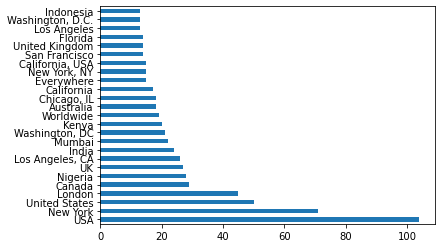

In [15]:
train_data_c['location'].value_counts()[:25].plot(kind='barh')
#some code inspiration drawn from https://mode.com/python-tutorial/counting-and-plotting-in-python/


<AxesSubplot:>

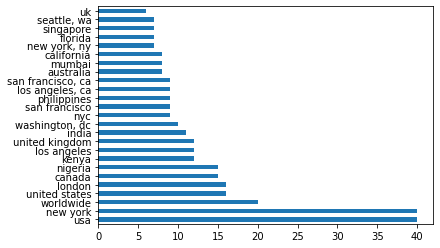

In [16]:
test_data_c['location'].value_counts()[:25].plot(kind='barh')


USA                           104
New York                       71
United States                  50
London                         45
Canada                         29
                             ... 
 Little Rock, AR                1
seattle grace mercy death       1
Memphis, in the Tennessees      1
Somewhere in Spain              1
Planet of da Bathing Apes       1
Name: location, Length: 3341, dtype: int64

This is just the top 25 most common locations in the training data, but it's clear there are duplicates and issues with data categorization. There is duplicates like "New York"/"New York, NY" and "United States"/"USA". There's also the fact that there are cities, states, and then countries, Such as India, Kenya, Canada, and then the UK, which is another categorization. Last of all, there is "Everywhere" and "Worldwide". I'm guessing this was a freeform field and could be difficult to do much with. 

In [25]:
locations = train_data_c['location'].value_counts()
print(locations)


USA                           104
New York                       71
United States                  50
London                         45
Canada                         29
                             ... 
 Little Rock, AR                1
seattle grace mercy death       1
Memphis, in the Tennessees      1
Somewhere in Spain              1
Planet of da Bathing Apes       1
Name: location, Length: 3341, dtype: int64


In [26]:
#locations.to_csv('C:/Users/bourg/OneDrive/Documents/springboard/location_data.csv')

Looking further at the data, there are 3341 different locations and there was clearly no data validation -- many of them are not real locations like "here", "??", a number, or "team slytherin". The dataset was created and tagged by the company Appen (at the time called Figure Eight), but there is no further information about how the location data was obtained. This, adding with the information that a large percentage of the df rows do not have any location info at all makes the location data largely unhelpful.

Looking at the keyword column: 

In [30]:
df_counts = train_data_c['keyword'].value_counts()
print(df_counts)

fatalities             45
deluge                 42
armageddon             42
harm                   41
sinking                41
                       ..
forest fire            19
epicentre              12
threat                 11
inundation             10
radiation emergency     9
Name: keyword, Length: 221, dtype: int64


In [31]:
len(df_counts)

221

<AxesSubplot:>

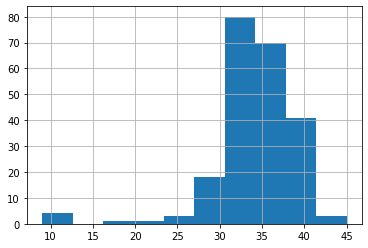

In [19]:
df_counts.hist()


In [20]:
df2_counts = test_data_c['keyword'].value_counts()
df2_counts

deluged         23
demolished      22
rubble          22
annihilation    21
snowstorm       21
                ..
fatalities       5
forest fire      5
threat           5
inundation       4
epicentre        1
Name: keyword, Length: 221, dtype: int64

This data has been preannotated. The most significant column is target, which indicates if the keyword is tuned to a genuine emergency. The values are either 0 or 1, 0 indicating negative, 1 indicating positive.  Only the training data set has this target column filled out.

Below is the distribution of the target values. 

<AxesSubplot:>

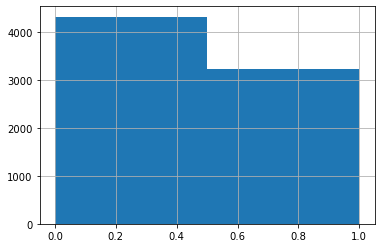

In [21]:
train_data_c['target'].hist(bins=2)
#target only has values 0 and 1